In [1]:
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from pre_processing import *
from algorithms import *
from spectrum_gen import *
from data_gen import *
from analysis import *
from datasets import *
from evaluation import *
#cr_filtering()
#cr_read_norm()1dasdas
import h5py
import scanpy as sc
from sinkhorn_knopp import sinkhorn_knopp as skp
from sklearn.metrics import adjusted_rand_score
gene='pck1'
up_lim=3.5
n_obs=1000
direction = 'up'

In [2]:
adata = read_liver_data_2(n_obs=n_obs)
adata = sort_data_crit(adata=copy.deepcopy(adata.copy()),crit='ZT',crit_list=['0','6','12','18'])
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_

View of AnnData object with n_obs × n_vars = 4000 × 14812
    obs: 'ZT', 'layer', 'batch'

In [3]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.filter_genes_dispersion(adata, n_top_genes=3000)
orig_adata = copy.deepcopy(adata.copy())



Trying to set attribute `.var` of view, copying.


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ZT' as categorical


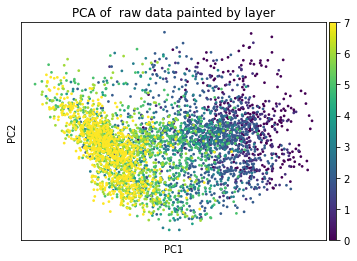

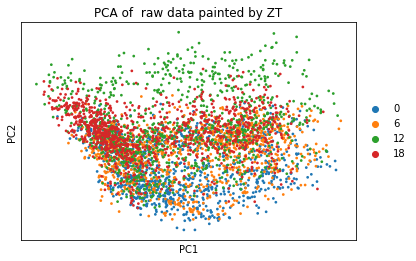

SpearmanrResult(correlation=0.2258394722550932, pvalue=1.9823540479782975e-47)
1111


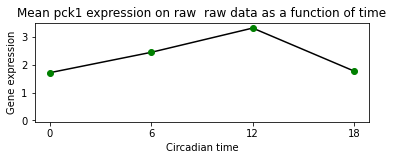

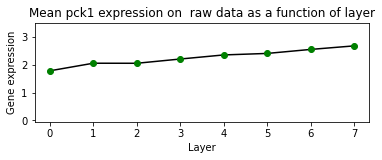

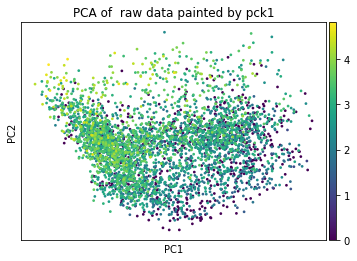

In [4]:
plots_liver(adata,title=" raw data")
print(corr_rank(adata,gene,direction))
plt_mean_gene_liver(adata,gene , up_lim=up_lim , title = " raw data" , color='g')


0.9993650612297036
25th Iteration    Loss :: 268012.0907523788 gradient :: 2742.198059302711


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ZT' as categorical


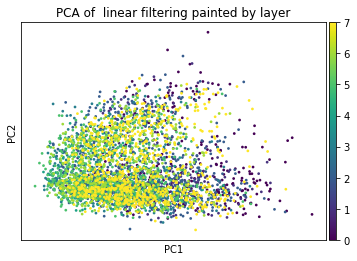

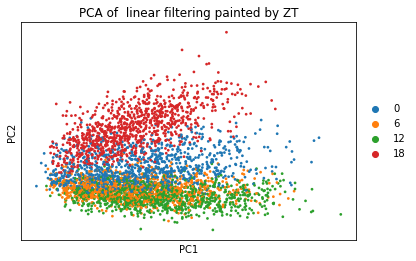

Spearman
SpearmanrResult(correlation=-0.1417784484906353, pvalue=2.0681143354061535e-19)
1111


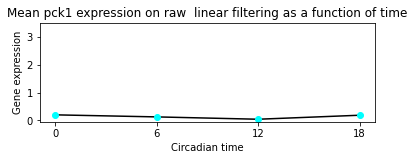

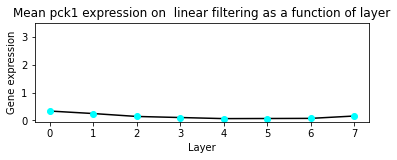

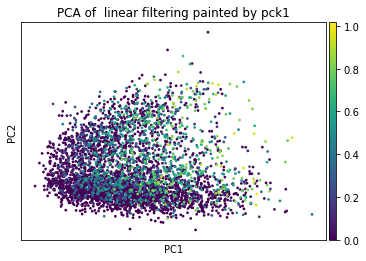

Norm change: 1361.2858403472994


In [5]:
linear_adata = copy.deepcopy(orig_adata.copy())
linear_adata = shuffle_adata(linear_adata)
linear_adata = sort_data_linear(linear_adata)
adata_linear_filtered = copy.deepcopy(linear_adata.copy())
#F =filter_linear_full(adata_linear_filtered.X, regu=50 ,iterNum=10,method = 'numeric' )
F = filtering_linear(adata_linear_filtered.X, regu=25 , regu_norm='L2' , iterNum=100 , method= 'numeric')
adata_linear_filtered.X = adata_linear_filtered.X * F
plots_liver(adata_linear_filtered,title=" linear filtering")
print("Spearman")
print(corr_rank(adata_linear_filtered,gene,direction))
plt_mean_gene_liver(adata_linear_filtered,gene , up_lim=up_lim , title = " linear filtering" , color='cyan')
print("Norm change: " +str(np.linalg.norm(linear_adata.X-adata_linear_filtered.X)))
adata_linear_filtered.write(filename="liver_linear_filtering.h5ad")


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ZT' as categorical


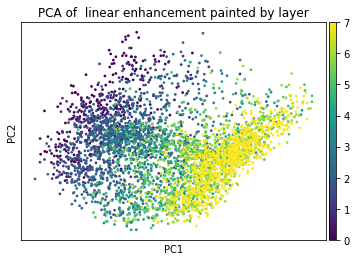

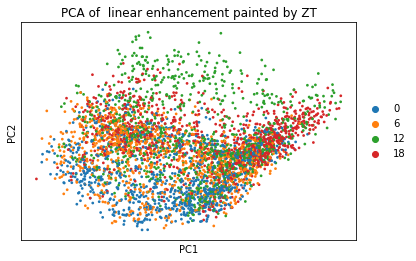

Spearman
SpearmanrResult(correlation=0.24160869590223996, pvalue=3.1509918243520177e-54)
1111


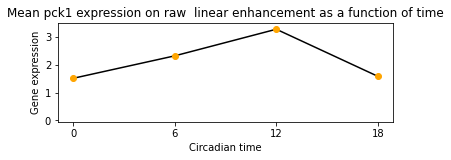

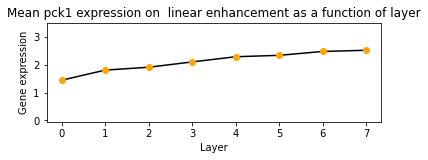

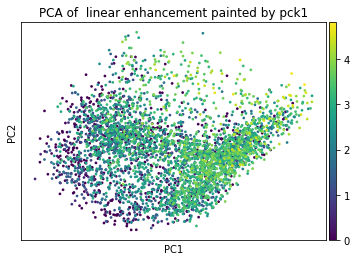

Norm change: 1041.9626380279935


In [6]:
adata_linear_enhanced = linear_adata.copy()
linear_adata = sort_data_linear(adata_linear_enhanced)
F_en = np.ones(F.shape)-F
adata_linear_enhanced.X = adata_linear_enhanced.X * F_en
plots_liver(adata_linear_enhanced,title=" linear enhancement")
print("Spearman")
print(corr_rank(adata_linear_enhanced,gene,direction))
plt_mean_gene_liver(adata_linear_enhanced,gene , up_lim=up_lim , title = " linear enhancement" , color='orange')
print("Norm change: " +str(np.linalg.norm(linear_adata.X-adata_linear_enhanced.X)))
adata_linear_enhanced.write(filename="liver_linear_en.h5ad")


starting filtering
25th Iteration    Loss :: 2070.5110725155405 gradient :: 46.75829502037575
50th Iteration    Loss :: 883.8995988404672 gradient :: 33.596951197192205
75th Iteration    Loss :: 596.6157885597229 gradient :: 13.849472915290088
100th Iteration    Loss :: 435.47219032230504 gradient :: 11.732044744711517
125th Iteration    Loss :: 383.33295348842853 gradient :: 8.696010278704962
150th Iteration    Loss :: 314.49450516991726 gradient :: 7.0253853655506715
175th Iteration    Loss :: 280.3149056926393 gradient :: 6.205559396732363
200th Iteration    Loss :: 251.14832528042962 gradient :: 5.515614424237596
225th Iteration    Loss :: 231.03598545483925 gradient :: 5.04176743860953
250th Iteration    Loss :: 207.26008635770484 gradient :: 4.489595802701054
275th Iteration    Loss :: 191.8383361873783 gradient :: 4.134998229508204
300th Iteration    Loss :: 174.37463154869772 gradient :: 3.7357884710610385


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ZT' as categorical


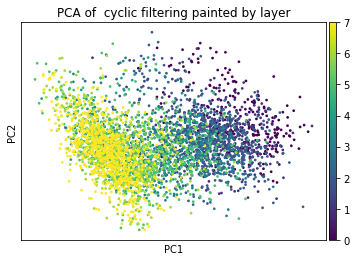

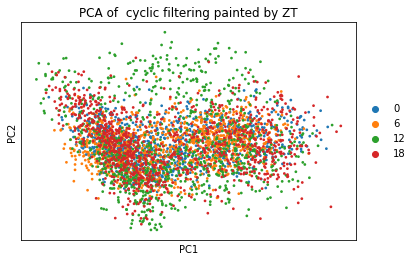

Spearman
SpearmanrResult(correlation=0.22700127480295948, pvalue=6.509486406025914e-48)
1111


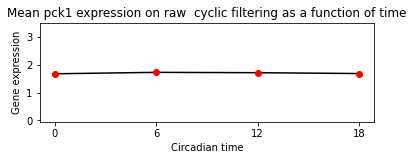

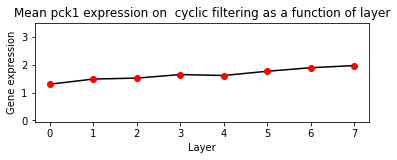

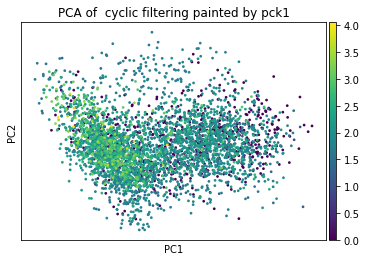

Norm change: 542.3389769107184


In [7]:
adata_cyclic_filtered = copy.deepcopy(orig_adata.copy())
F = filtering_cyclic(adata_cyclic_filtered.X, regu=0, iterNum=300, verbosity=25)
adata_cyclic_filtered.X = adata_cyclic_filtered.X * F
plots_liver(adata_cyclic_filtered,title=" cyclic filtering")
print("Spearman")
print(corr_rank(adata_cyclic_filtered,gene,direction))
plt_mean_gene_liver(adata_cyclic_filtered,gene , up_lim=up_lim , title = " cyclic filtering" , color='r')
print("Norm change: " +str(np.linalg.norm(orig_adata.X-adata_cyclic_filtered.X)))
#adata_cyclic_filtered.write(filename="liver_cyclic_filtered.h5ad")

25th Iteration    Loss :: 733.4957820230092 gradient :: 22.03602466996397
Iteration number: 1 function value: 62228.43187896554
Iteration number: 26 function value: 266725.5386288832
Iteration number: 51 function value: 273855.7526446224
Iteration number: 76 function value: 275849.19918786094


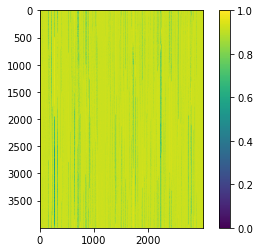

/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ZT' as categorical


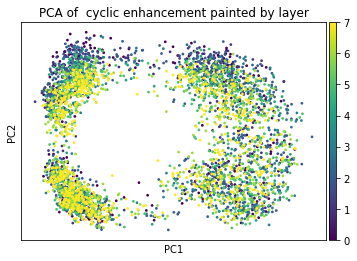

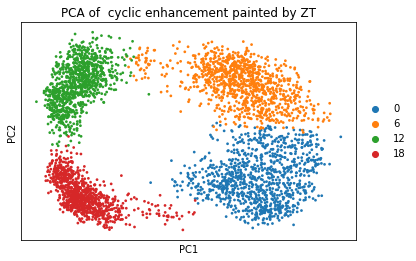

Spearman
SpearmanrResult(correlation=0.03721576595886563, pvalue=0.0185820353930106)
1111


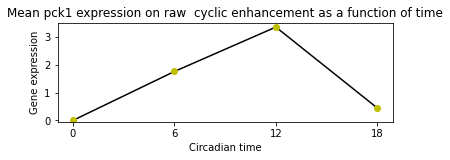

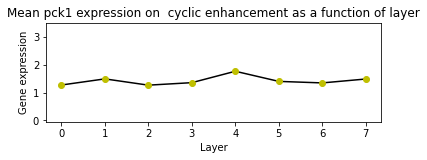

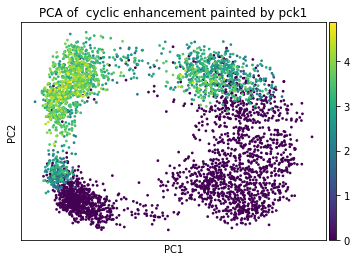

Norm change: 1358.9962481663254


In [8]:
adata_cyclic_enhancment = copy.deepcopy(orig_adata.copy())
D = filter_non_cyclic_genes_line(adata_cyclic_enhancment.X, regu=0.5,iterNum=25)
adata_cyclic_enhancment.X = adata_cyclic_enhancment.X.dot(D)
F =enhancement_cyclic(adata_cyclic_enhancment.X, regu=0.01 ,iterNum=100)
adata_cyclic_enhancment.X = adata_cyclic_enhancment.X * F
plots_liver(adata_cyclic_enhancment,title=" cyclic enhancement")
print("Spearman")
print(corr_rank(adata_cyclic_enhancment,gene,direction))
plt_mean_gene_liver(adata_cyclic_enhancment,gene , up_lim=up_lim , title = " cyclic enhancement" , color='y')
print("Norm change: " +str(np.linalg.norm(orig_adata.X-adata_cyclic_enhancment.X)))
#adata_cyclic_enhancment.write(filename="liver_cyclic_enhancement.h5ad")


1111


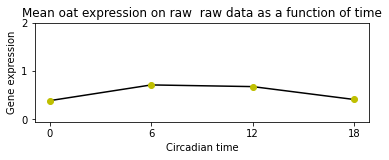

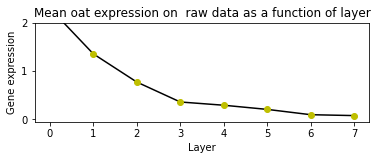

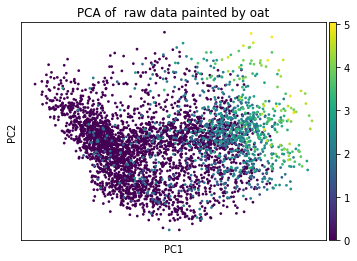

1111


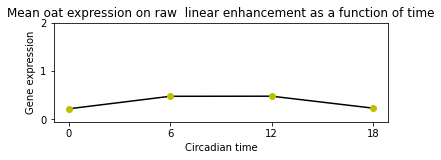

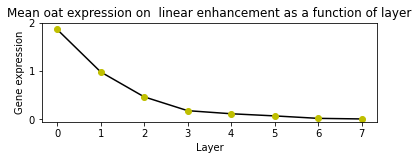

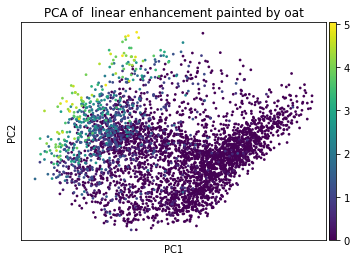

1111


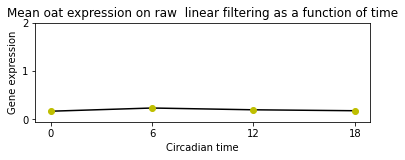

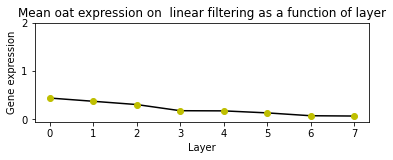

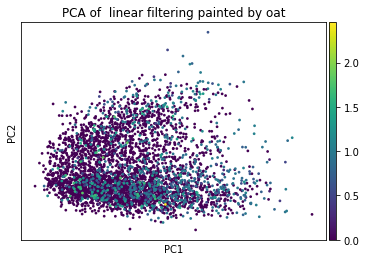

In [26]:
gene_list_z = ['glul', 'cyp2f2', 'cyp1a2', 'pck1', 'cyp2e1', 'cdh2',  'cyp7a1', 'acly', 'alb', 'oat']
gene = 'oat'#, 'cyp1a2']#, 'pck1', 'cyp2e1', 'cdh2',  'cyp7a1', 'acly', 'alb', 'oat']
plt_mean_gene_liver(adata,gene , up_lim=2 , title = " raw data" , color='y')
plt_mean_gene_liver(adata_linear_enhanced,gene , up_lim=2, title = " linear enhancement" , color='y')
plt_mean_gene_liver(adata_linear_filtered,gene , up_lim=2 , title = " linear filtering" , color='y')


In [ ]:

linear_adata = copy.deepcopy(orig_adata.copy())
linear_adata = shuffle_adata(linear_adata)
linear_adata = sort_data_linear(linear_adata)
adata_linear_en_2 = copy.deepcopy(linear_adata.copy())
#F =filter_linear_full(adata_linear_filtered.X, regu=50 ,iterNum=10,method = 'numeric' )
F = enhance_linear_full(adata_linear_en_2.X, regu=0.1 , iterNum=100 , method= 'numeric')
adata_linear_en_2.X = adata_linear_en_2.X * F
plots_liver(adata_linear_en_2,title=" linear enhancement")
print("Spearman")
print(corr_rank(adata_linear_en_2,gene,direction))
plt_mean_gene_liver(adata_linear_en_2,'pck1' , up_lim=up_lim , title = " linear filtering" , color='cyan')
